In [1]:
import os
os.chdir("..")

In [2]:
from struc2vec.src import struc2vec  as s2v
import networkx as nx
# from gensim.models import Word2Vec
import numpy as np
# from sklearn.decomposition import PCA
import fastdtw
import json

In [3]:
# Construct graph
G = nx.karate_club_graph()

In [4]:
G_D = nx.DiGraph(G)

In [5]:
# Create s2v graph object
s2vG = s2v.struc2vec(G_D)

In [6]:
s2vG.getMultiLevelGraph()

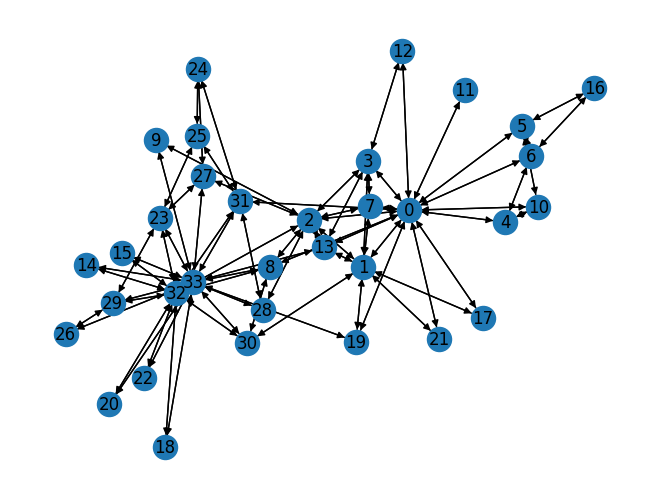

In [7]:
nx.draw_spring(s2vG.G_D, with_labels=True)

In [8]:
walks = s2vG.getRandomWalks(number_of_walks = 1000, walk_length=20)

In [13]:
with open('walks.json', 'w') as f:
    json.dump(walks, f)

In [ ]:
# model = Word2Vec(walks, vector_size=50)

NameError: name 'Word2Vec' is not defined

In [ ]:
# embeddings = {node: model.wv[node] for node in s2vG.nodes}

In [ ]:
# X = np.array(list(embeddings.values()))

In [ ]:
# pca = PCA(n_components=3)
# X_transform = pca.fit_transform(X)

In [ ]:
# node_embeddings = {}
# for node, embedding in enumerate(X_transform):
#     emb_list = list(embedding)
#     index = emb_list.index(max(emb_list))
#     node_embeddings[node] = index

In [14]:
with open("embedding.json", "r") as f:
    node_embeddings = json.load(f)

In [16]:
cmap = {0:"green",1:"yellow", 2:"red"}
nodecolors = [cmap[v] for k,v in node_embeddings.items()]

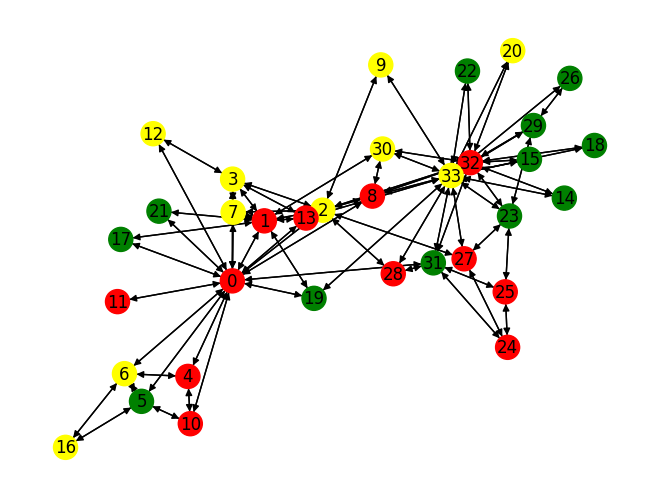

In [18]:
nx.draw_spring(s2vG.G_D, with_labels=True, node_color=nodecolors)